# Data exploration


1) Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
1) Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
1) Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
1) Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
1) Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


other notes are on https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../../data/melb_data.csv')

In [3]:
df_train.dtypes

import csv

data_info_csv_path = '../../data/data-info.csv'
with open(data_info_csv_path, 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Name', 'Types', 'Segment', 'Expectation', 'Conclusion', 'Comments'])
    for column in df_train.columns:
        filewriter.writerow([column, df_train[column].dtypes])

pd.read_csv(data_info_csv_path)


Name    Types  Segment  Expectation  Conclusion  Comments
0          Suburb   object      NaN          NaN         NaN       NaN
1         Address   object      NaN          NaN         NaN       NaN
2           Rooms    int64      NaN          NaN         NaN       NaN
3            Type   object      NaN          NaN         NaN       NaN
4           Price  float64      NaN          NaN         NaN       NaN
5          Method   object      NaN          NaN         NaN       NaN
6         SellerG   object      NaN          NaN         NaN       NaN
7            Date   object      NaN          NaN         NaN       NaN
8        Distance  float64      NaN          NaN         NaN       NaN
9        Postcode  float64      NaN          NaN         NaN       NaN
10       Bedroom2  float64      NaN          NaN         NaN       NaN
11       Bathroom  float64      NaN          NaN         NaN       NaN
12            Car  float64      NaN          NaN         NaN       NaN
13       Landsize  float64      NaN          NaN         NaN       NaN
14   BuildingArea  float64      NaN          NaN         NaN       NaN
15      YearBuilt  float64      NaN          NaN         NaN       NaN
16    CouncilArea   object      NaN          NaN         NaN       NaN
17      Lattitude  float64      NaN          NaN         NaN       NaN
18     Longtitude  float64      NaN          NaN         NaN       NaN
19     Regionname   object      NaN          NaN         NaN       NaN
20  Propertycount  float64      NaN          NaN         NaN       NaN

In [4]:
df_train.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [5]:
df_train.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

# Visualisation

## Seaborn

<AxesSubplot:title={'center':'Super title'}, ylabel='Price'>

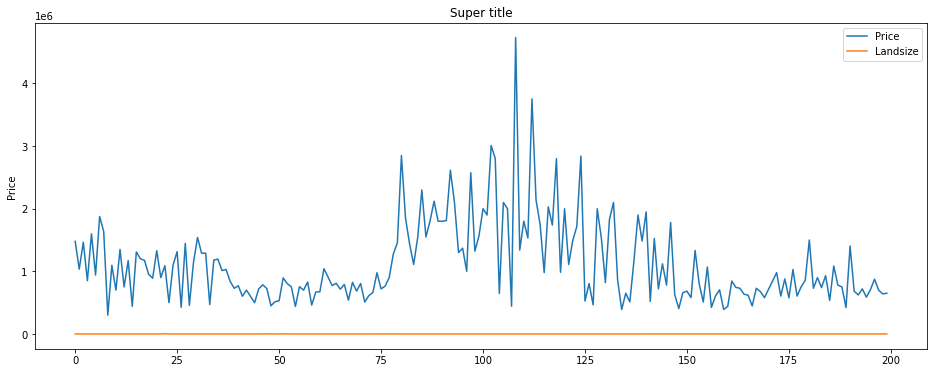

In [6]:


# Set the width and height of the figure
plt.figure(figsize=(16,6))
plt.title("Super title")

loc_max = 200
sns.lineplot(data=df_train.iloc[0:loc_max].Price, label="Price")
sns.lineplot(data=df_train.iloc[0:loc_max].Landsize, label="Landsize")



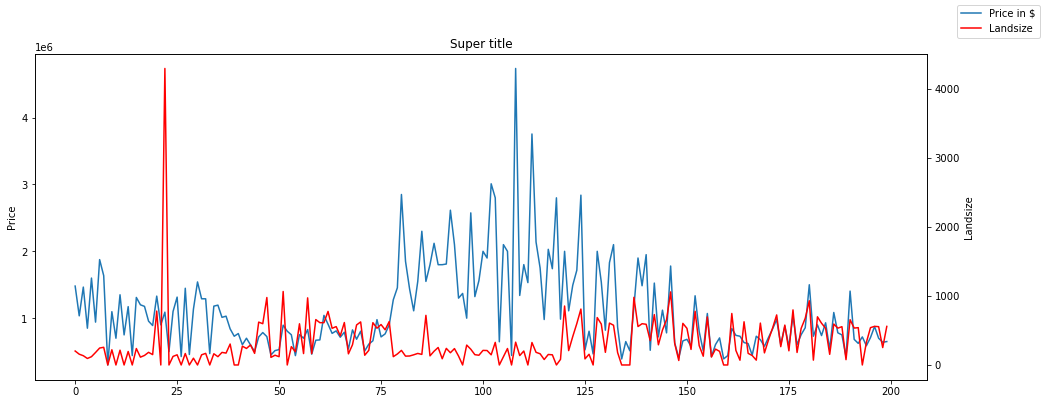

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
plt.title("Super title")

loc_max = 200

df_price = df_train.iloc[0:loc_max].Price
df_landsize = df_train.iloc[0:loc_max].Landsize

ax = sns.lineplot(data=df_price, label="Price in $", legend=False)
# Create a second y-axis with the scaled ticks
ax2 = ax.twinx()

sns.lineplot(data=df_landsize, label="Landsize", legend=False, color="r")
ax.figure.legend()

<AxesSubplot:xlabel='Price', ylabel='Landsize'>

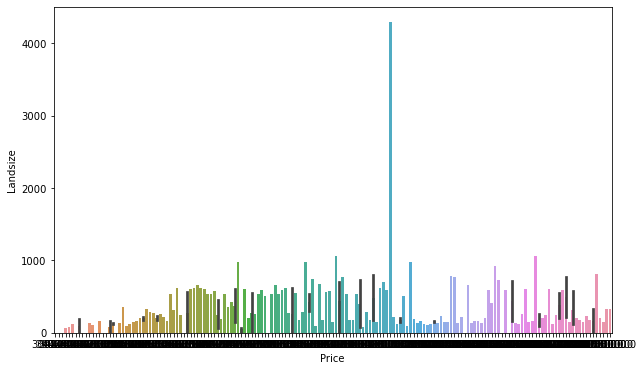

In [8]:
plt.figure(figsize=(10,6))


# Bar chart relation landsize and price
sns.barplot(x=df_price, y=df_landsize)

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

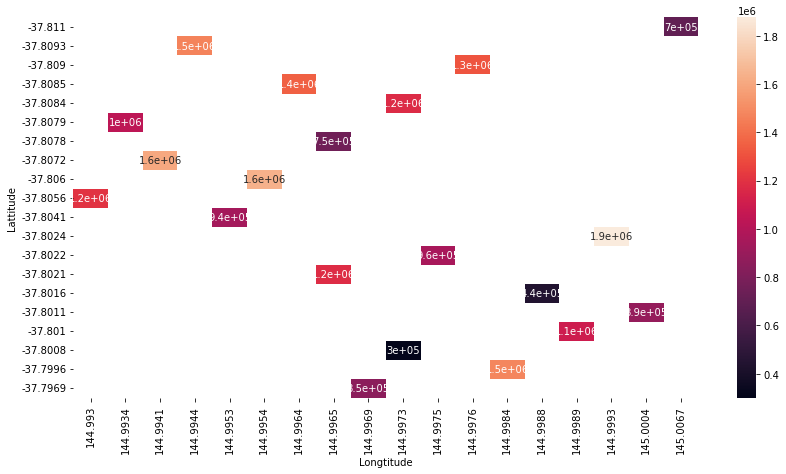

In [9]:


plt.figure(figsize=(14,7))


heatmap_df = df_train[["Price", "Lattitude", "Longtitude"]][0:20]
# heatmap_df
heatmap_df_piv = heatmap_df.pivot(index="Lattitude", columns='Longtitude', values='Price')

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=heatmap_df_piv, annot=True)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

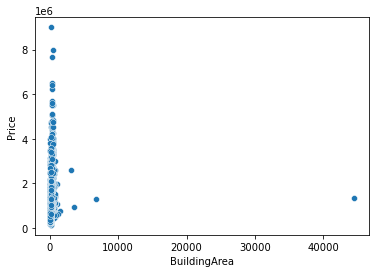

In [10]:
sns.scatterplot(y=df_train.Price, x=df_train.BuildingArea)

In [11]:
# whitout outliers
q_low = df_train["Price"].quantile(0.01)
q_hi  = df_train["Price"].quantile(0.99)
df_filtered = df_train[(df_train["Price"] < q_hi) & (df_train["Price"] > q_low)]

q_low = df_filtered["BuildingArea"].quantile(0.01)
q_hi  = df_filtered["BuildingArea"].quantile(0.99)
df_filtered_2 = df_filtered[(df_filtered["BuildingArea"] < q_hi) & (df_filtered["BuildingArea"] > q_low)]

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

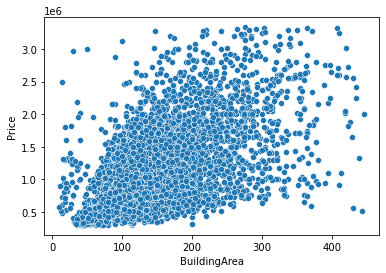

In [12]:
sns.scatterplot(y=df_filtered_2.Price, x=df_filtered_2.BuildingArea)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

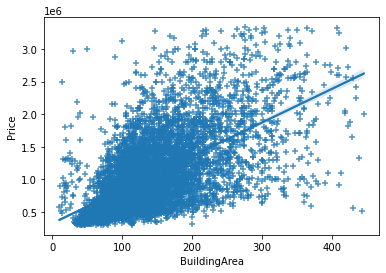

In [13]:
sns.regplot(x=df_filtered_2.BuildingArea, y=df_filtered_2.Price, marker="+")

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

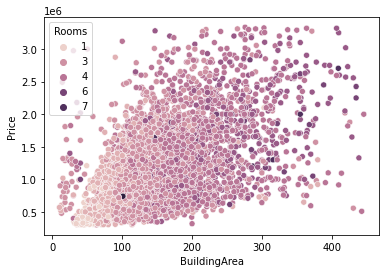

In [14]:
sns.scatterplot(x=df_filtered_2.BuildingArea, y=df_filtered_2.Price, hue=df_filtered_2.Rooms)

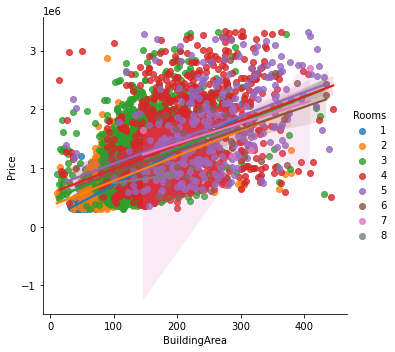

In [15]:
sns.lmplot(x="BuildingArea", y="Price", hue="Rooms", data=df_filtered_2)

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

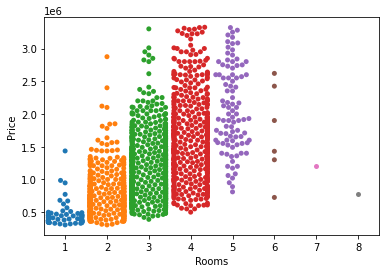

In [16]:
nb_rows = 2000
df_filtered_2_cut = df_filtered_2.iloc[:nb_rows]

sns.swarmplot(x=df_filtered_2_cut.Rooms, y=df_filtered_2_cut.Price)

## Distribution

<AxesSubplot:xlabel='Rooms'>

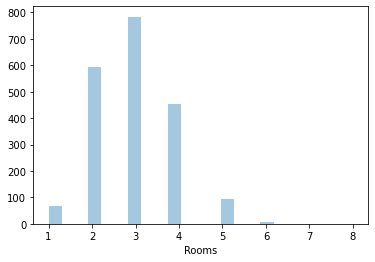

In [22]:
sns.distplot(a=df_filtered_2_cut.Rooms, kde=False)

### Density

<AxesSubplot:xlabel='Price', ylabel='Density'>

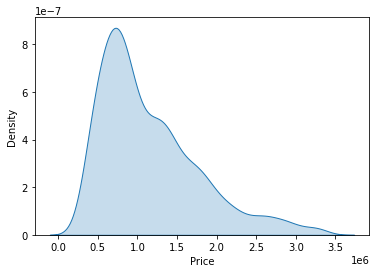

In [23]:
sns.kdeplot(data=df_filtered_2_cut.Price, shade=True)

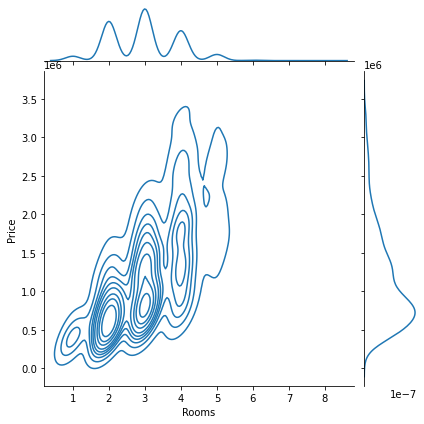

In [38]:
sns.jointplot(x=df_filtered_2_cut.Rooms, y=df_filtered_2_cut.Price, kind="kde")

### Color-coded plots

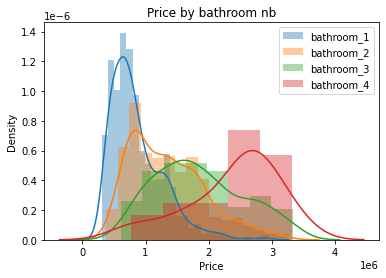

In [36]:
bathroom_1 = df_filtered_2_cut.where(df_filtered_2_cut["Bathroom"] == 1)
bathroom_2 = df_filtered_2_cut.where(df_filtered_2_cut["Bathroom"] == 2)
bathroom_3 = df_filtered_2_cut.where(df_filtered_2_cut["Bathroom"] == 3)
bathroom_4 = df_filtered_2_cut.where(df_filtered_2_cut["Bathroom"] == 4)

sns.distplot(a=bathroom_1.Price, label="bathroom_1")
sns.distplot(a=bathroom_2.Price, label="bathroom_2")
sns.distplot(a=bathroom_3.Price, label="bathroom_3")
sns.distplot(a=bathroom_4.Price, label="bathroom_4")

plt.title("Price by bathroom nb")

plt.legend()